# Preparing the Dataset

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [39]:
# Kept the original dataset
listingsNYC = pd.read_csv('listings.csv', dtype=object)

In [40]:
# Dropping all of the columns which we will not use
# listingsNYC= listingsNYC.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
# listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC['neighbourhood'].unique().shape[0]
listingsNYC.describe()
listingsNYC['annual_revenue'] = (365 - listingsNYC['availability_365']) *  listingsNYC['price']
listingsNYC = listingsNYC[(listingsNYC['price'] != 0)]
listingsNYC.loc[:,'log_price']=np.log(listingsNYC['price'])
listingsNYC.loc[:,'log_pps']=np.log(listingsNYC['pps'])
listingsNYC.loc[:,'is_budget'] = listingsNYC['log_pps'].apply(lambda x: x < 6.69864257)
listingsNYC.loc[:,'is_luxury'] = listingsNYC['log_pps'].apply(lambda x: x > 6.69864257)
listingsNYC
# listingsNYC['price_bin'] = pd.cut(listingsNYC['price'], bins=range(0, 111, 10), right=False, labels=range(0, 110, 10))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps,annual_revenue,log_price,log_pps,is_budget,is_luxury
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,1,267,1,NaN,5775,26950,5.616771,8.661294,False,True
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,...,1,0,0,NaN,150,27375,4.317488,5.010635,True,False
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,...,2,322,0,NaN,1800,2580,4.094345,7.495542,False,True
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,1,79,50,NaN,136,19448,4.219508,4.912655,True,False
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,...,3,365,1,NaN,5250,0,5.164786,8.565983,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,...,3,358,0,NaN,400,560,4.382027,5.991465,True,False
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.63832893587064,-74.01671019409663,Entire home/apt,42,...,3,89,0,NaN,1260,11592,3.737670,7.138867,False,True
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.74690169639175,-73.97826030246593,Entire home/apt,3888,...,8,365,0,NaN,7776,0,8.265650,8.958797,False,True
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.74959584319043,-73.98079769535242,Entire home/apt,3888,...,2,364,0,NaN,7776,3888,8.265650,8.958797,False,True


In [41]:
df = listingsNYC[(listingsNYC['price']<2000) & (listingsNYC['price']>20) & (listingsNYC['minimum_nights'] < 30)]
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue,log_price,log_pps
count,21690.000000,21690.000000,21690.000000,18659.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000
mean,221.639696,3.418442,38.833287,1.959596,8.148041,171.741263,14.499216,703.313324,40219.488751,5.079702,5.933164
std,229.568948,4.171019,69.240917,2.265433,25.637217,138.881675,23.650862,1200.655745,55265.613054,0.755109,1.068130
min,22.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,28.000000,0.000000,3.091042,3.332205
25%,92.000000,1.000000,2.000000,0.560000,1.000000,32.000000,1.000000,175.000000,5867.500000,4.521789,5.164786
50%,150.000000,2.000000,13.000000,1.450000,2.000000,156.000000,7.000000,368.000000,25011.000000,5.010635,5.908083
75%,255.000000,4.000000,44.000000,2.820000,4.000000,333.000000,22.000000,750.000000,52045.500000,5.541264,6.620073
max,1999.000000,29.000000,1666.000000,102.980000,200.000000,365.000000,992.000000,31668.000000,729635.000000,7.600402,10.363062


In [42]:
df['price_bin'] = pd.cut(df['price'], bins=range(0, 2001, 20), right=False, labels=range(0, 2000, 20))
df


C:\Users\Roger\AppData\Local\Temp\ipykernel_20784\3098205244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bin'] = pd.cut(df['price'], bins=range(0, 2001, 20), right=False, labels=range(0, 2000, 20))


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,pps,annual_revenue,log_price,log_pps,is_budget,is_luxury,price_bin
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,267,1,NaN,5775,26950,5.616771,8.661294,False,True,260
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,...,0,0,NaN,150,27375,4.317488,5.010635,True,False,60
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,79,50,NaN,136,19448,4.219508,4.912655,True,False,60
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Laurie,Brooklyn,South Slope,40.66801,-73.98784,Private room,124,...,163,14,NaN,496,25048,4.820282,6.206576,True,False,120
8,7097,Perfect for Your Parents: Privacy + Garden,17571,Jane,Brooklyn,Fort Greene,40.691233,-73.972702,Entire home/apt,220,...,38,36,NaN,660,71940,5.393628,6.492240,True,False,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41525,772714221060214808,Good Vibes at The Bronx,421264574,Aridio,Bronx,Unionport,40.828074,-73.847886,Entire home/apt,125,...,60,0,NaN,250,38125,4.828314,5.521461,True,False,120
41526,772716724205003579,2 bedroom Condo near West Village,481177884,Steven,Manhattan,Chelsea,40.740030367077864,-73.99730227211336,Entire home/apt,1114,...,355,0,NaN,3342,11140,7.015712,8.114325,False,True,1100
41527,771961589340472067,Habitación Privada,409771624,Camila,Queens,Sunnyside,40.742223,-73.92331,Private room,124,...,360,0,NaN,248,620,4.820282,5.513429,True,False,120
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,...,358,0,NaN,400,560,4.382027,5.991465,True,False,80


In [43]:
price_bin_grouping_mean = df.groupby('price_bin').mean()
price_bin_grouping_count = df.groupby('price_bin').count()
price_bin_grouping_count = price_bin_grouping_count[['price']]
price_bin_grouping_count.rename(columns={'price':'price_bin_count'}, inplace=True)
price_bin_grouping = pd.merge(price_bin_grouping_mean,price_bin_grouping_count, how = 'left', on= 'price_bin')
price_bin_grouping

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue,log_price,log_pps,is_budget,is_luxury,price_bin_count
price_bin,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20,34.215517,5.400862,31.560345,1.259948,15.603448,107.159483,8.323276,182.715517,8761.159483,3.526285,4.599573,0.948276,0.051724,232
40,50.635757,4.008902,40.243323,1.682653,5.431751,145.074926,12.507418,199.879822,11042.496291,3.918408,4.816243,0.951039,0.048961,1348
60,69.224384,3.446174,40.830523,1.927416,4.832685,178.793342,14.264591,237.591440,12871.320796,4.233718,5.044669,0.944661,0.055339,2313
80,89.295786,3.183980,45.611181,2.041228,3.454735,175.791406,15.629954,284.160617,16891.409262,4.489583,5.277164,0.948269,0.051731,2397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1907.250000,2.250000,0.500000,2.000000,19.250000,345.250000,0.500000,4292.750000,37742.500000,7.553410,8.174637,0.000000,1.000000,4
1920,1929.000000,1.500000,6.800000,0.505000,52.700000,281.800000,1.500000,2893.500000,160488.300000,7.564752,7.813243,0.000000,1.000000,10
1940,1950.750000,1.000000,0.000000,NaN,91.500000,343.250000,0.000000,1950.750000,42434.250000,7.575967,7.575967,0.000000,1.000000,4


<AxesSubplot:xlabel='price_bin', ylabel='price_bin_count'>

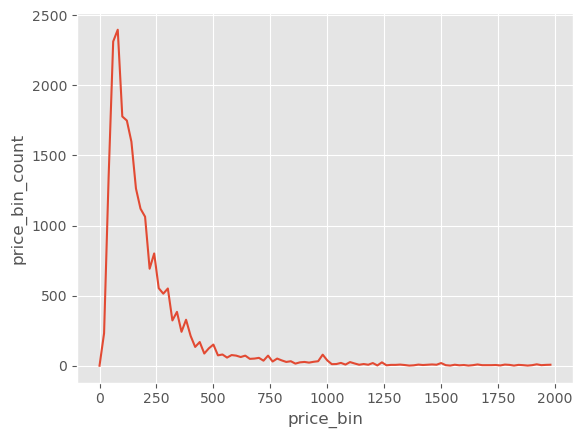

In [44]:
sns.lineplot(x = price_bin_grouping.index, y = 'price_bin_count', data=price_bin_grouping)


<AxesSubplot:xlabel='price_bin', ylabel='availability_365'>

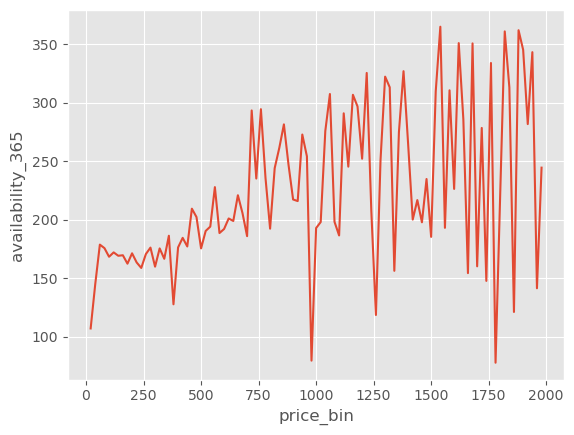

In [45]:
sns.lineplot(x = price_bin_grouping.index, y = 'availability_365', data=price_bin_grouping)


This may show that there may be a market at the 225-250 price bin. This is because there seems to be less availbility in the 250 bin. How much would be needed to justify the increase in price into a new price bin? What can you do as a lister to justify the jump in annual revenue? 

For example what could I do with 2000 that would justify my client paying $20 more per night. 



There is less competition at 250 than at 200 price bin, while also having what seems to be a higher estimated revenue and lower average availablity meaning there is still demand for this price bin. The amount of listing in this criteria may be underserving the demand. 



Text(0, 0.5, 'Average Annual Revenue')

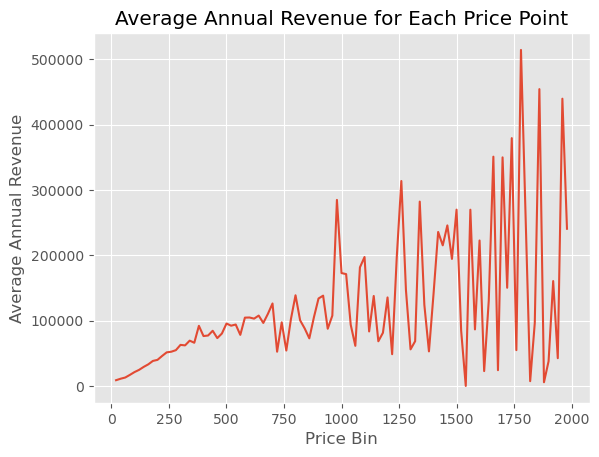

In [46]:
sns.lineplot(x = price_bin_grouping.index, y = 'annual_revenue', data=price_bin_grouping)
plt.title('Average Annual Revenue for Each Price Point')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

In [47]:
brooklyn = df[df['neighbourhood_group']=='Brooklyn']
manhattan = df[df['neighbourhood_group']=='Manhattan']
queens = df[df['neighbourhood_group']=='Queens']
bronx = df[df['neighbourhood_group']=='Bronx']
staten_island = df[df['neighbourhood_group']=='Staten Island']



In [48]:
brooklyn_price_bin_grouping_mean = brooklyn.groupby('price_bin').mean()
brooklyn_price_bin_grouping_count = brooklyn.groupby('price_bin').count()

manhattan_price_bin_grouping_mean = manhattan.groupby('price_bin').mean()
manhattan_price_bin_grouping_count = manhattan.groupby('price_bin').count()

queens_price_bin_grouping_mean = queens.groupby('price_bin').mean()
queens_price_bin_grouping_count = queens.groupby('price_bin').count()

bronx_price_bin_grouping_mean = bronx.groupby('price_bin').mean()
bronx_price_bin_grouping_count = bronx.groupby('price_bin').count()

staten_island_price_bin_grouping_mean = staten_island.groupby('price_bin').mean()
staten_island_price_bin_grouping_count = staten_island.groupby('price_bin').count()


In [49]:
brooklyn_price_bin_grouping_count = brooklyn_price_bin_grouping_count[['price']]
brooklyn_price_bin_grouping_count.rename(columns={'price':'price_bin_count'}, inplace=True)
brooklyn_price_bin_grouping = pd.merge(brooklyn_price_bin_grouping_mean,brooklyn_price_bin_grouping_count, how = 'left', on= 'price_bin')

manhattan_price_bin_grouping_count = manhattan_price_bin_grouping_count[['price']]
manhattan_price_bin_grouping_count.rename(columns={'price':'price_bin_count'}, inplace=True)
manhattan_price_bin_grouping = pd.merge(manhattan_price_bin_grouping_mean,manhattan_price_bin_grouping_count, how = 'left', on= 'price_bin')

queens_price_bin_grouping_count = queens_price_bin_grouping_count[['price']]
queens_price_bin_grouping_count.rename(columns={'price':'price_bin_count'}, inplace=True)
quenns_price_bin_grouping = pd.merge(queens_price_bin_grouping_mean,queens_price_bin_grouping_count, how = 'left', on= 'price_bin')

bronx_price_bin_grouping_count = bronx_price_bin_grouping_count[['price']]
bronx_price_bin_grouping_count.rename(columns={'price':'price_bin_count'}, inplace=True)
bronx_price_bin_grouping = pd.merge(bronx_price_bin_grouping_mean,bronx_price_bin_grouping_count, how = 'left', on= 'price_bin')

staten_island_price_bin_grouping_count = staten_island_price_bin_grouping_count[['price']]
staten_island_price_bin_grouping_count.rename(columns={'price':'price_bin_count'}, inplace=True)
staten_islandprice_bin_grouping = pd.merge(staten_island_price_bin_grouping_mean,staten_island_price_bin_grouping_count, how = 'left', on= 'price_bin')

brooklyn_price_bin_grouping

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue,log_price,log_pps,is_budget,is_luxury,price_bin_count
price_bin,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20,34.058252,5.601942,28.417476,1.128554,2.902913,81.844660,7.058252,189.669903,9550.689320,3.520070,4.718953,0.951456,0.048544,103
40,50.227612,4.498134,32.052239,1.340315,5.242537,107.332090,10.598881,224.072761,12832.658582,3.910090,4.930679,0.938433,0.061567,536
60,69.349106,3.799159,36.924290,1.787743,6.029443,167.920084,13.239748,260.363828,13636.597266,4.235522,5.140749,0.931651,0.068349,951
80,89.224429,3.533267,47.672294,1.863804,2.884806,165.851043,15.222443,314.965243,17741.502483,4.488772,5.357417,0.936445,0.063555,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1900.000000,1.000000,0.000000,NaN,12.000000,365.000000,0.000000,1900.000000,0.000000,7.549609,7.549609,0.000000,1.000000,1
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Text(0, 0.5, 'Average Annual Revenue')

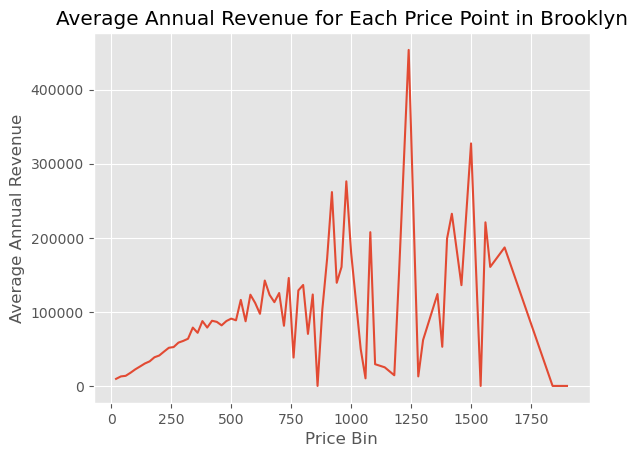

In [30]:
sns.lineplot(x = brooklyn_price_bin_grouping_mean.index, y = 'annual_revenue', data=brooklyn_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Brooklyn')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

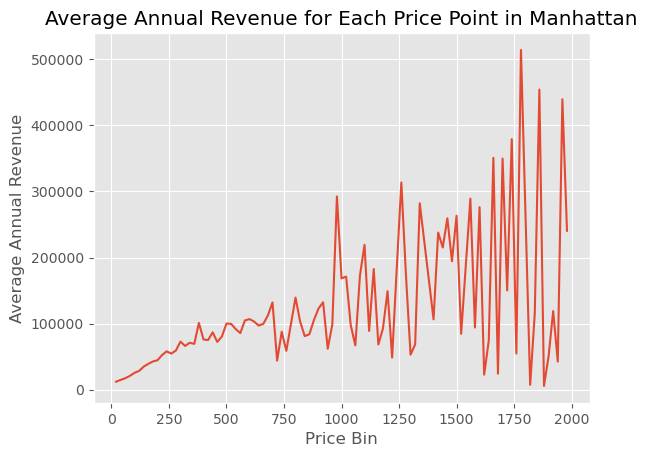

In [31]:
sns.lineplot(x = manhattan_price_bin_grouping_mean.index, y = 'annual_revenue', data=manhattan_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Manhattan')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

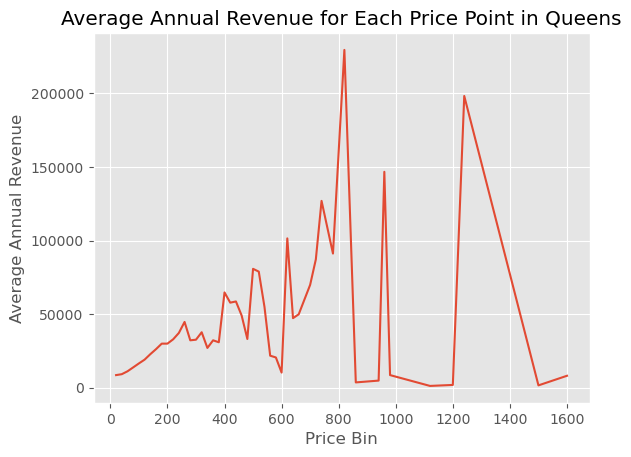

In [32]:
sns.lineplot(x = queens_price_bin_grouping_mean.index, y = 'annual_revenue', data=queens_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Queens')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

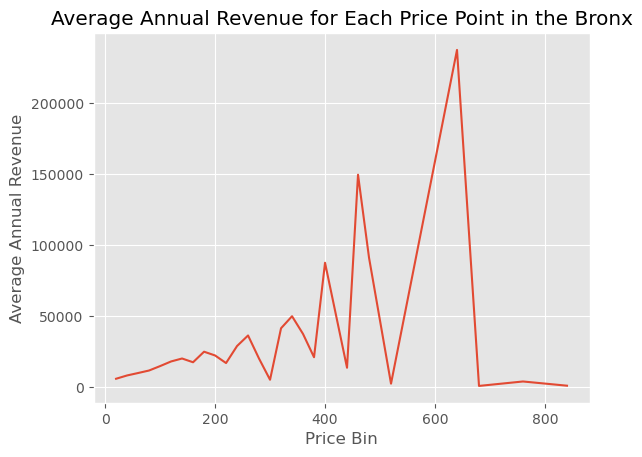

In [33]:
sns.lineplot(x = bronx_price_bin_grouping_mean.index, y = 'annual_revenue', data=bronx_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in the Bronx')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Average Annual Revenue')

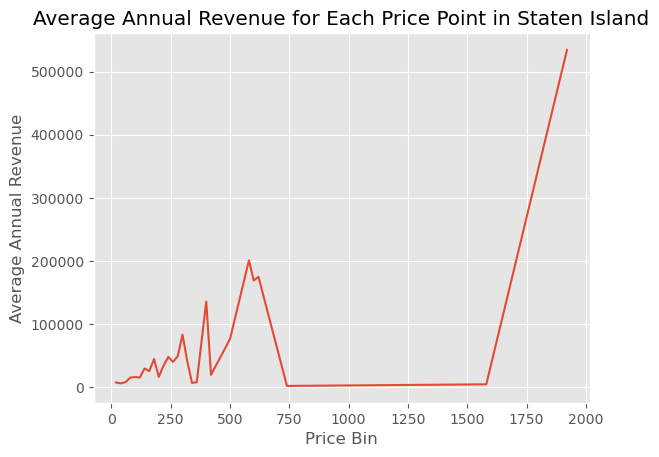

In [34]:
sns.lineplot(x = staten_island_price_bin_grouping_mean.index, y = 'annual_revenue', data=staten_island_price_bin_grouping_mean)
plt.title('Average Annual Revenue for Each Price Point in Staten Island')
plt.xlabel('Price Bin')
plt.ylabel('Average Annual Revenue')

Text(0, 0.5, 'Count')

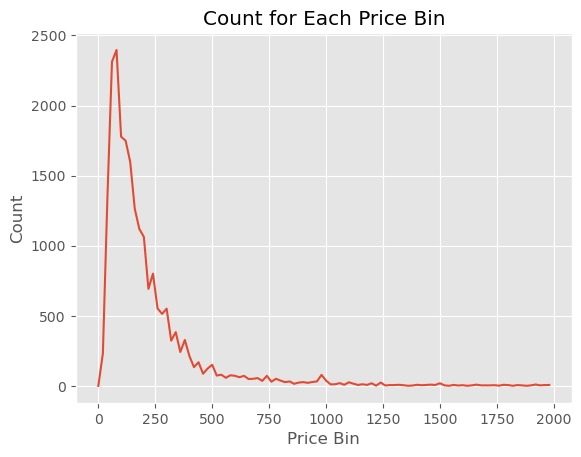

In [51]:
sns.lineplot(x = price_bin_grouping.index, y = 'count', data=price_bin_grouping)
plt.title('Count for Each Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Count')

Text(0, 0.5, 'Average Reviews Per Month')

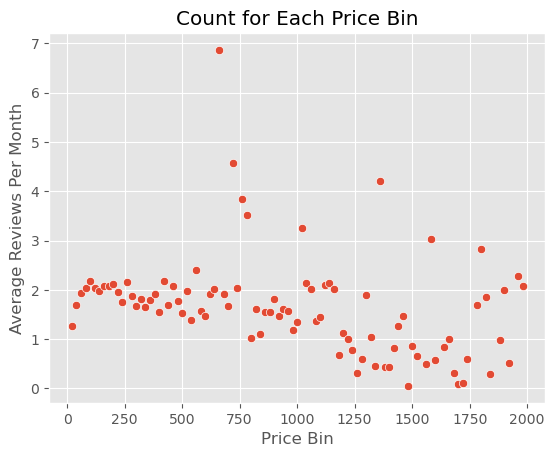

In [54]:
sns.scatterplot(x = price_bin_grouping.index, y = 'reviews_per_month', data=price_bin_grouping)
plt.title('Count for Each Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Average Reviews Per Month')